# Image Manipulation Demo

This notebook demonstrates loading a sample image and applying various transformations including rotation, mirroring, and cropping.

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from dataset import TemporalWindowDataset

# Set random seed for reproducibility
np.random.seed(42)

## Load a Sample Image

First, let's load a sample image from our dataset. We'll use the first frame from the training data.

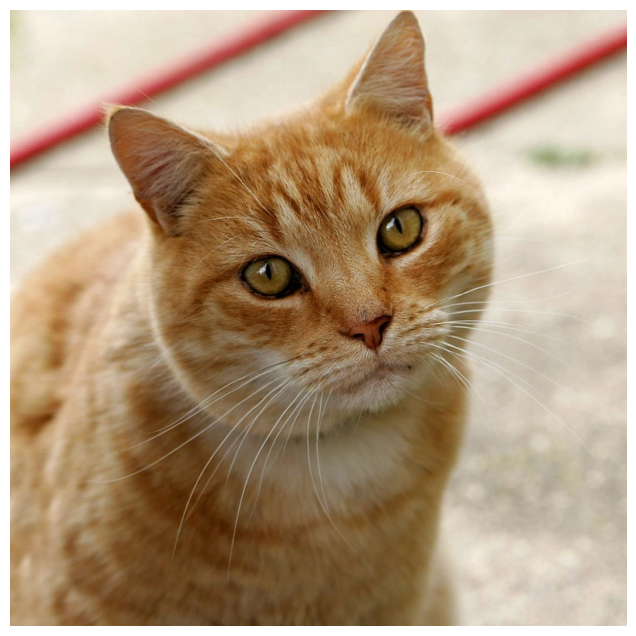

In [9]:
# # Initialize dataset
# data_dir = "data"
# dataset = TemporalWindowDataset(
#     data_dir=data_dir,
#     window_size=256,  # Use full image size
#     window_step=256,  # No sliding window
#     sequence_length=1,  # Single frame
#     augment=False,  # No augmentation for original image
#     normalize=True
# )

# # Get the first sample
# sample = dataset[0]
# image = sample[0][0].numpy()  # Get the first frame
image = cv2.cvtColor(cv2.imread('archive/cat.png'), cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

## Image Transformations

Now let's apply three different transformations to the image:
1. Rotation (90 degrees)
2. Horizontal Mirroring
3. Cropping

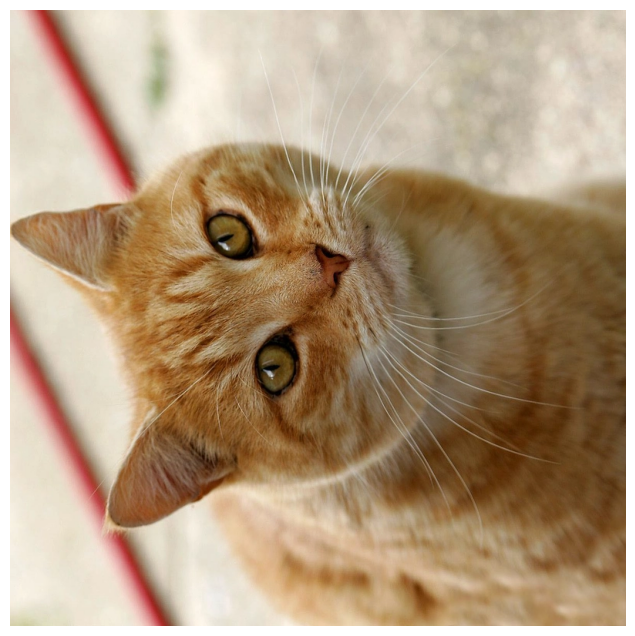

In [10]:
plt.figure(figsize=(8, 8))
plt.imshow(np.rot90(image))
plt.axis('off')
plt.show()

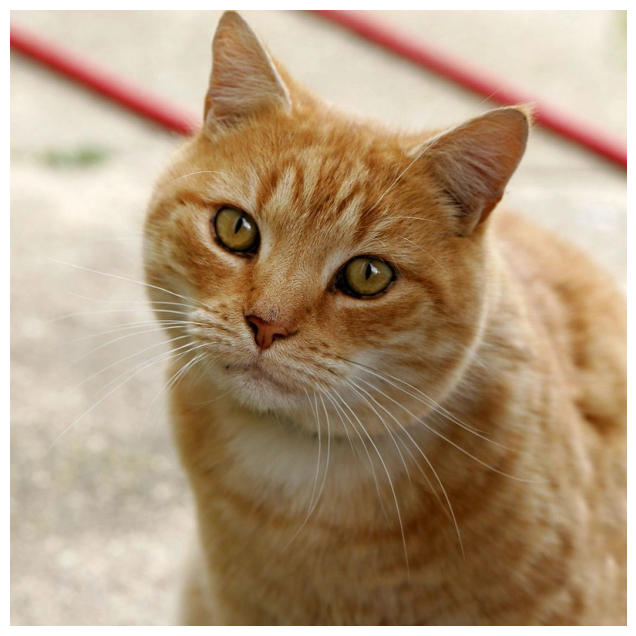

In [11]:
plt.figure(figsize=(8, 8))
plt.imshow(np.fliplr(image))
plt.axis('off')
plt.show()

In [12]:
def rotate_image(image, angle):
    # Get image dimensions
    height, width = image.shape[:2]
    
    # Calculate the center of the image
    center = (width // 2, height // 2)
    
    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # Calculate new dimensions to fit the rotated image
    cos = np.abs(rotation_matrix[0, 0])
    sin = np.abs(rotation_matrix[0, 1])
    
    new_width = int((height * sin) + (width * cos))
    new_height = int((height * cos) + (width * sin))
    
    # Adjust the rotation matrix to account for translation
    rotation_matrix[0, 2] += (new_width / 2) - center[0]
    rotation_matrix[1, 2] += (new_height / 2) - center[1]
    
    # Perform the rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height))
    
    return rotated_image

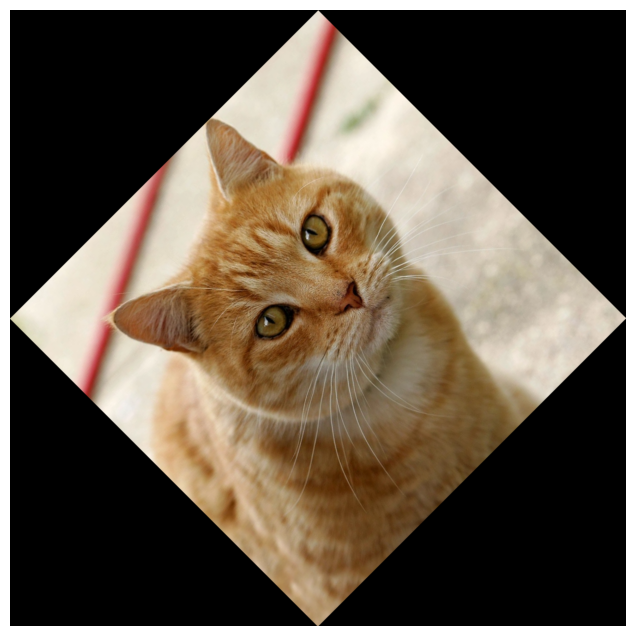

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(rotate_image(image, 45))
plt.axis('off')
plt.show()


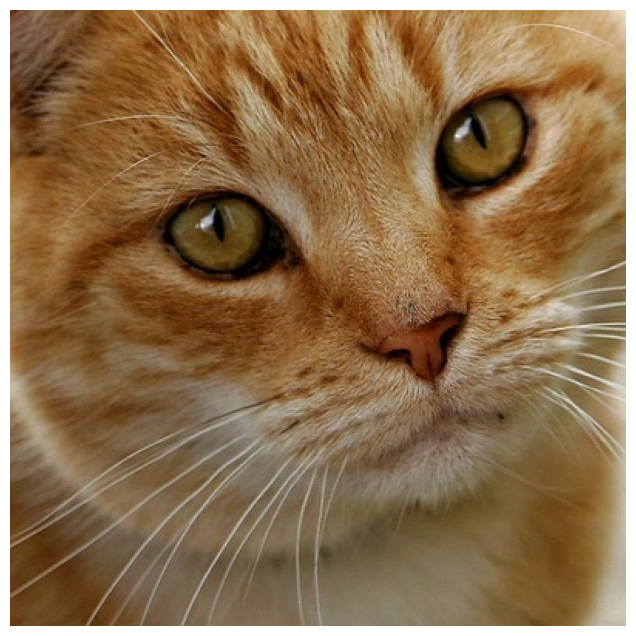

In [17]:
plt.figure(figsize=(8, 8))
height, width, _ = image.shape
crop_size = min(height, width) // 2
start_y = (height - crop_size) // 2
start_x = (width - crop_size) // 2
cropped = image[start_y:start_y+crop_size, start_x:start_x+crop_size]
plt.axis('off')
plt.imshow(cropped)

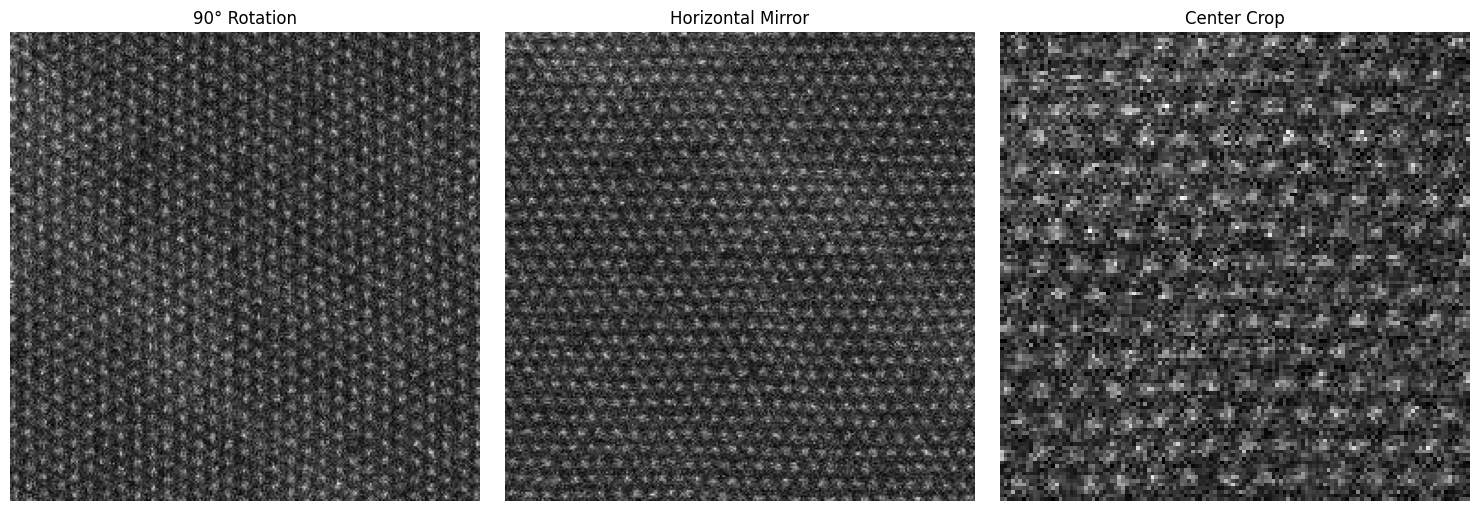

In [3]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Rotation (90 degrees)
rotated = np.rot90(image)
axes[0].imshow(rotated, cmap='gray')
axes[0].set_title('90° Rotation')
axes[0].axis('off')

# 2. Horizontal Mirroring
mirrored = np.fliplr(image)
axes[1].imshow(mirrored, cmap='gray')
axes[1].set_title('Horizontal Mirror')
axes[1].axis('off')

# 3. Cropping (center crop)
height, width = image.shape
crop_size = min(height, width) // 2
start_y = (height - crop_size) // 2
start_x = (width - crop_size) // 2
cropped = image[start_y:start_y+crop_size, start_x:start_x+crop_size]
axes[2].imshow(cropped, cmap='gray')
axes[2].set_title('Center Crop')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Combined Transformations

Let's also demonstrate combining multiple transformations on the same image.

In [ ]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Rotate and Mirror
rot_mirror = np.fliplr(np.rot90(image))
axes[0].imshow(rot_mirror, cmap='gray')
axes[0].set_title('Rotate + Mirror')
axes[0].axis('off')

# 2. Crop and Rotate
crop_rot = np.rot90(cropped)
axes[1].imshow(crop_rot, cmap='gray')
axes[1].set_title('Crop + Rotate')
axes[1].axis('off')

# 3. Crop and Mirror
crop_mirror = np.fliplr(cropped)
axes[2].imshow(crop_mirror, cmap='gray')
axes[2].set_title('Crop + Mirror')
axes[2].axis('off')

plt.tight_layout()
plt.show()